In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The original dataset comes from kaagle.com. It contains the data scraped from the portal fragrantica.com

In [2]:
df_all = pd.read_csv("perfume.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_all.head()

,brand,title,date,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,clslove_female25under,clslove_male25under,clslove_female25older,clslove_male25older,clslike_female25under,clslike_male25under,clslike_female25older,clslike_male25older,clsdislike_female25under,clsdislike_male25under,clsdislike_female25older,clsdislike_male25older,clswinter_female25under,clswinter_male25under,clswinter_female25older,clswinter_male25older,clsspring_female25under,clsspring_male25under,clsspring_female25older,clsspring_male25older,clssummer_female25under,clssummer_male25under,clssummer_female25older,clssummer_male25older,clsautumn_female25under,clsautumn_male25under,clsautumn_female25older,clsautumn_male25older,clsday_female25under,clsday_male25under,clsday_female25older,clsday_male25older,clsnight_female25under,clsnight_male25under,clsnight_female25older,clsnight_male25older,Ihaveit,Ihadit,Iwantit,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,gender
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,"woody,earthy,animalic,amber,musky,balsamic",5.0,3,0,0,0,0,3,0,1,0,3,100,1,1,50,50,50,50,0,0,50,50,1,1,1,100,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,3.0,0.0,0.0,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,Top4Agarwood (Oud),Middle0Sandalwood,Middle1Agarwood (Oud),Middle2Cypriol Oil or Nagarmotha,Middle3Benzoin,Base0Amber,Base1Castoreum,Base2Civet,Base3Moss,Base4Agarwood (Oud),Base5Indian Oud,NaN,NaN,NaN,NaN,NaN,NaN,women
1,Ajmal,Aatifa Ajmal for women and men,2014,"fresh spicy,woody,musky,rose,amber",4.2,10,1,0,0,0,5,0,0,3,3,100,80,20,100,60,60,60,0,0,80,80,1,1,60,40,1,1,80,1,1,1,20,1,1,1,80,20,1,1,40,20,1,1,60,1,1,1,60,1,1,1,60,20,1,1,60,20,8.0,0.0,0.0,Top1Rose,Top2Cumin,Middle0Amber,Middle1Woody Notes,Base0Musk,Base1Amber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,"rose,woody,musky,oud,fruity",0.0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,3.0,Top1Rose,Top2Sandalwood,Top3Apple,Top4Agarwood (Oud),Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,"white floral,green,ozonic,fresh,animalic",0.0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,0.0,0.0,1.0,Top1Green Tea,Top2White Flowers,Top3Ozonic notes,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,"woody,warm spicy,amber,balsamic,musky",0.0,2,0,0,0,0,2,0,2,0,0,1,1,1,100,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,0.0,0.0,2.0,Top1Amber,Top2Sandalwood,Top3Floral Notes,Top4Vetiver,Top5Saffron,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women


In [5]:
df_all.shape

(51212, 86)

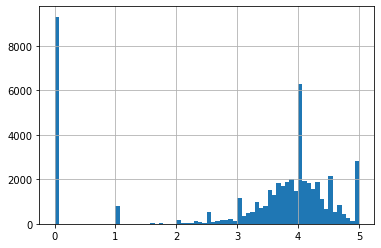

In [6]:
df_all['rating_score'].hist(bins=70)

In [7]:
more20 = df_all[df_all['votes'] >= 20]

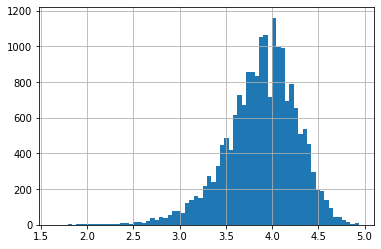

In [8]:
more20['rating_score'].hist(bins=70)

In [9]:
more20.shape

(18778, 86)

In [10]:
#print(more20['votes'].value_counts(normalize = True).cumsum()[:20])

In [11]:
#len(more20.columns)

In [12]:
#len(more20['rating_score'].unique()) #len(more20['rating_score'].unique()) -> 285

In [13]:
#more20['rating_score'].value_counts()

In [14]:
#df_no_zeros = df_all[df_all['rating_score'] != 0.0]

In [15]:
#df_no_zeros.shape

In [16]:
df_no_age = more20.drop(['clslove_female25under', 'clslove_male25under', 'clslove_female25older',
       'clslove_male25older', 'clslike_female25under', 'clslike_male25under',
       'clslike_female25older', 'clslike_male25older',
       'clsdislike_female25under', 'clsdislike_male25under',
       'clsdislike_female25older', 'clsdislike_male25older',
       'clswinter_female25under', 'clswinter_male25under',
       'clswinter_female25older', 'clswinter_male25older',
       'clsspring_female25under', 'clsspring_male25under',
       'clsspring_female25older', 'clsspring_male25older',
       'clssummer_female25under', 'clssummer_male25under',
       'clssummer_female25older', 'clssummer_male25older',
       'clsautumn_female25under', 'clsautumn_male25under',
       'clsautumn_female25older', 'clsautumn_male25older',
       'clsday_female25under', 'clsday_male25under', 'clsday_female25older',
       'clsday_male25older', 'clsnight_female25under', 'clsnight_male25under',
       'clsnight_female25older', 'clsnight_male25older'], axis = 1)

In [17]:
#df_no_age.head()

In [18]:
df = df_no_age.drop(['date','notes_1', 'notes_2', 'notes_3', 'notes_4',
       'notes_5', 'notes_6', 'notes_7', 'notes_8', 'notes_9', 'notes_10',
       'notes_11', 'notes_12', 'notes_13', 'notes_14', 'notes_15', 'notes_16',
       'notes_17', 'notes_18', 'notes_19', 'notes_20'], axis = 1)

In [19]:
df.head()

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,gender
8,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,women
10,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,women
12,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,women
13,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,women
14,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,women


In [20]:
#df['gender'].unique() -> 3966 NaN -> unisex

In [21]:
df['gender'].fillna('unisex', inplace=True)

In [22]:
#df[df.isna().any(axis=1)]

In [23]:
df.isna().sum()

brand                   0
title                   0
accords                69
rating_score            0
votes                   0
longevity_poor          0
longevity_weak          0
longevity_moderate      0
longevity_long          0
longevity_very_long     0
sillage_soft            0
sillage_moderate        0
sillage_heavy           0
sillage_enormous        0
clslove                 0
clslike                 0
clsdislike              0
clswinter               0
clsspring               0
clssummer               0
clsautumn               0
clscold                 0
clshot                  0
clsday                  0
clsnight                0
Ihaveit                 0
Ihadit                  0
Iwantit                 0
gender                  0
dtype: int64

In [24]:
df.shape

(18778, 29)

In [25]:
# !!!!!! Be carefull!! 1 means 0 !!!!!!

In [26]:
#df[df.isna().any(axis=1)]

In [27]:
#df.head()

In [28]:
df = df.dropna()

In [29]:
df.shape

(18709, 29)

In [30]:
df = df.reset_index(drop=True)

In [31]:
df

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,gender
0,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,women
1,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,women
2,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,women
3,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,women
4,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18704,Frapin,Paradis Perdu Frapin for women and men,"green,woody,citrus,aromatic,fresh spicy",3.71,125,3,3,7,23,1,6,32,10,7,100,74,55,10,63,27,29,0,0,65,17,58.0,0.0,0.0,women
18705,Chopard,Oud Malaki Chopard for men,"tobacco,oud,warm spicy,woody,animalic,amber,Pi...",4.42,274,7,9,20,38,47,21,44,58,47,100,54,10,52,13,6,33,0,0,22,50,241.0,0.0,0.0,unisex
18706,Tesori-d-Oriente,Te Verde Tesori d'Oriente for women and men,"green,white floral,musky,aldehydic,ozonic",3.66,41,0,5,3,0,1,3,3,4,4,36,100,31,21,68,42,31,1,1,78,15,37.0,0.0,0.0,women
18707,Rance-1795,Rose de Rose Rance 1795 for women,"rose,woody,white floral,vanilla,yellow floral,...",3.77,29,0,0,2,4,0,0,5,6,2,75,100,41,33,75,8,16,0,0,66,8,19.0,0.0,0.0,women


In [32]:
df['accords'][0]

'balsamic,woody,smoky,fresh spicy,warm spicy'

In [33]:
df = pd.concat([df,df.accords.str.split(',',expand=True)],1)

In [34]:
df[6].unique()

array([None, 'Videos', 'Pictures'], dtype=object)

In [35]:
df = df.drop([6,7], axis = 1)

In [36]:
df = df.rename(columns={0: 'accord_1', 1: 'accord_2', 2: 'accord_3', 3:'accord_4', 4: 'accord_5', 5: 'accord_6'})

In [37]:
df

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,gender,accord_1,accord_2,accord_3,accord_4,accord_5,accord_6
0,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,women,balsamic,woody,smoky,fresh spicy,warm spicy,None
1,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,women,woody,powdery,balsamic,floral,ozonic,None
2,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,women,fruity,patchouli,woody,earthy,sweet,citrus
3,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,women,fruity,woody,sweet,balsamic,yellow floral,Pictures
4,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,women,fruity,sweet,white floral,patchouli,citrus,Videos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18704,Frapin,Paradis Perdu Frapin for women and men,"green,woody,citrus,aromatic,fresh spicy",3.71,125,3,3,7,23,1,6,32,10,7,100,74,55,10,63,27,29,0,0,65,17,58.0,0.0,0.0,women,green,woody,citrus,aromatic,fresh spicy,None
18705,Chopard,Oud Malaki Chopard for men,"tobacco,oud,warm spicy,woody,animalic,amber,Pi...",4.42,274,7,9,20,38,47,21,44,58,47,100,54,10,52,13,6,33,0,0,22,50,241.0,0.0,0.0,unisex,tobacco,oud,warm spicy,woody,animalic,amber
18706,Tesori-d-Oriente,Te Verde Tesori d'Oriente for women and men,"green,white floral,musky,aldehydic,ozonic",3.66,41,0,5,3,0,1,3,3,4,4,36,100,31,21,68,42,31,1,1,78,15,37.0,0.0,0.0,women,green,white floral,musky,aldehydic,ozonic,None
18707,Rance-1795,Rose de Rose Rance 1795 for women,"rose,woody,white floral,vanilla,yellow floral,...",3.77,29,0,0,2,4,0,0,5,6,2,75,100,41,33,75,8,16,0,0,66,8,19.0,0.0,0.0,women,rose,woody,white floral,vanilla,yellow floral,powdery


In [38]:
kala = list(df['accord_1'].unique()) + list(df['accord_2'].unique()) + list(df['accord_3'].unique()) + list(df['accord_4'].unique()) + list(df['accord_5'].unique())  + list(df['accord_6'].unique()) 

In [39]:
mich = list(filter(None, kala))

In [40]:
lista = np.array(mich)

In [41]:
len(np.unique(lista))

78

In [42]:
df.isna().sum()

brand                     0
title                     0
accords                   0
rating_score              0
votes                     0
longevity_poor            0
longevity_weak            0
longevity_moderate        0
longevity_long            0
longevity_very_long       0
sillage_soft              0
sillage_moderate          0
sillage_heavy             0
sillage_enormous          0
clslove                   0
clslike                   0
clsdislike                0
clswinter                 0
clsspring                 0
clssummer                 0
clsautumn                 0
clscold                   0
clshot                    0
clsday                    0
clsnight                  0
Ihaveit                   0
Ihadit                    0
Iwantit                   0
gender                    0
accord_1                  0
accord_2                 69
accord_3                111
accord_4                198
accord_5                334
accord_6               3911
dtype: int64

In [43]:
df = df.replace({'Pictures': None})

In [44]:
df = df.replace({'Videos': None})

In [45]:
df.head()

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,gender,accord_1,accord_2,accord_3,accord_4,accord_5,accord_6
0,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,women,balsamic,woody,smoky,fresh spicy,warm spicy,None
1,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,women,woody,powdery,balsamic,floral,ozonic,None
2,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,women,fruity,patchouli,woody,earthy,sweet,citrus
3,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,women,fruity,woody,sweet,balsamic,yellow floral,None
4,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,women,fruity,sweet,white floral,patchouli,citrus,None


In [46]:
kala1 = list(df['accord_1'].unique()) + list(df['accord_2'].unique()) + list(df['accord_3'].unique()) + list(df['accord_4'].unique()) + list(df['accord_5'].unique())  + list(df['accord_6'].unique()) 

In [47]:
mich1 = list(filter(None, kala1))

In [48]:
lista1 = np.array(mich1)

In [49]:
mich2 = np.unique(lista1)

In [50]:
#df = pd.get_dummies(df, columns = ['accord_1', 'accord_2']) #(pd.Series(list('abcaa')))

In [51]:
df.shape

(18709, 35)

In [52]:
 s = pd.Series(mich2).astype('category')

In [53]:
s

0           alcohol
1         aldehydic
2            almond
3             amber
4          animalic
          ...      
71     white floral
72       white wine
73             wine
74            woody
75    yellow floral
Length: 76, dtype: category
Categories (76, object): [alcohol, aldehydic, almond, amber, ..., white wine, wine, woody, yellow floral]

In [54]:
df

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,gender,accord_1,accord_2,accord_3,accord_4,accord_5,accord_6
0,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,women,balsamic,woody,smoky,fresh spicy,warm spicy,None
1,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,women,woody,powdery,balsamic,floral,ozonic,None
2,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,women,fruity,patchouli,woody,earthy,sweet,citrus
3,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,women,fruity,woody,sweet,balsamic,yellow floral,None
4,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,women,fruity,sweet,white floral,patchouli,citrus,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18704,Frapin,Paradis Perdu Frapin for women and men,"green,woody,citrus,aromatic,fresh spicy",3.71,125,3,3,7,23,1,6,32,10,7,100,74,55,10,63,27,29,0,0,65,17,58.0,0.0,0.0,women,green,woody,citrus,aromatic,fresh spicy,None
18705,Chopard,Oud Malaki Chopard for men,"tobacco,oud,warm spicy,woody,animalic,amber,Pi...",4.42,274,7,9,20,38,47,21,44,58,47,100,54,10,52,13,6,33,0,0,22,50,241.0,0.0,0.0,unisex,tobacco,oud,warm spicy,woody,animalic,amber
18706,Tesori-d-Oriente,Te Verde Tesori d'Oriente for women and men,"green,white floral,musky,aldehydic,ozonic",3.66,41,0,5,3,0,1,3,3,4,4,36,100,31,21,68,42,31,1,1,78,15,37.0,0.0,0.0,women,green,white floral,musky,aldehydic,ozonic,None
18707,Rance-1795,Rose de Rose Rance 1795 for women,"rose,woody,white floral,vanilla,yellow floral,...",3.77,29,0,0,2,4,0,0,5,6,2,75,100,41,33,75,8,16,0,0,66,8,19.0,0.0,0.0,women,rose,woody,white floral,vanilla,yellow floral,powdery


In [55]:
for i in mich1:
    df[i] = 0.0

In [56]:
df.shape

(18709, 111)

In [57]:
ppp = df['accord_6'][0] 

In [58]:
df['balsamic'][0]

0.0

In [59]:
#df['woody'][0]=df['woody'][0]+1.0

In [60]:
for i in range(0, 18709):
    for acc in ('accord_1', 'accord_2', 'accord_3', 'accord_4', 'accord_5', 'accord_6'):
        p = df[acc][i]
        if p != None:
              df[p][i] = df[p][i] +1 # co jak nan
            
                

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [61]:
df

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,gender,accord_1,accord_2,accord_3,accord_4,accord_5,accord_6,balsamic,woody,fruity,white floral,sweet,musky,green,floral,amber,earthy,patchouli,citrus,warm spicy,vanilla,aromatic,whiskey,powdery,fresh spicy,rose,ozonic,cherry,aquatic,leather,tuberose,fresh,metallic,animalic,oud,herbal,aldehydic,marine,almond,coffee,soft spicy,yellow floral,tobacco,cinnamon,nutty,cacao,smoky,caramel,coconut,honey,tropical,beeswax,rum,coca-cola,milky,salty,bacon,sand,vodka,savory,wine,sour,lactonic,bitter,tennis ball,gourmand,clay,conifer,white wine,industrial glue,terpenic,narcotic,tonka (coumarin),soapy,vinyl,watery,asphault,camphor,caramela,anis,violet,mossy,alcohol
0,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,women,balsamic,woody,smoky,fresh spicy,warm spicy,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,women,woody,powdery,balsamic,floral,ozonic,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,women,fruity,patchouli,woody,earthy,sweet,citrus,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,women,fruity,woody,sweet,balsamic,yellow floral,None,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,women,fruity,sweet,white floral,patchouli,citrus,None,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [62]:
df.shape

(18709, 111)

In [63]:
df['longevity'] = np.nan

In [64]:
for i in range (0, 18709):
    k = (df['longevity_poor'][i] + df['longevity_weak'][i] + df['longevity_moderate'][i] + df['longevity_long'][i] + df['longevity_very_long'][i])
    if k != 0 : 
        df['longevity'][i] = round(((df['longevity_poor'][i]*1 + df['longevity_weak'][i]*2 + df['longevity_moderate'][i]*3 + df['longevity_long'][i]*4 + df['longevity_very_long'][i]*5)/k),2)
    else:
        df['longevity'][i] = 0.0

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df['sillage'] = np.nan

In [66]:
for i in range(0, 18709):
    m = (df['sillage_soft'][i] + df['sillage_moderate'][i] + df['sillage_heavy'][i] + df['sillage_enormous'][i])
    if m != 0 :
        df['sillage'][i] = round(((df['sillage_soft'][i]*1 + df['sillage_moderate'][i]*2 + df['sillage_heavy'][i]*3 + df['sillage_enormous'][i]*4)/m),2)
    else:
        df['sillage'][i] = 0.0

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
df

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,gender,accord_1,accord_2,accord_3,accord_4,accord_5,accord_6,balsamic,woody,fruity,white floral,sweet,musky,green,floral,amber,earthy,patchouli,citrus,warm spicy,vanilla,aromatic,whiskey,powdery,fresh spicy,rose,ozonic,cherry,aquatic,leather,tuberose,fresh,metallic,animalic,oud,herbal,aldehydic,marine,almond,coffee,soft spicy,yellow floral,tobacco,cinnamon,nutty,cacao,smoky,caramel,coconut,honey,tropical,beeswax,rum,coca-cola,milky,salty,bacon,sand,vodka,savory,wine,sour,lactonic,bitter,tennis ball,gourmand,clay,conifer,white wine,industrial glue,terpenic,narcotic,tonka (coumarin),soapy,vinyl,watery,asphault,camphor,caramela,anis,violet,mossy,alcohol,longevity,sillage
0,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,women,balsamic,woody,smoky,fresh spicy,warm spicy,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.50,2.40
1,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,women,woody,powdery,balsamic,floral,ozonic,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.83,2.12
2,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,women,fruity,patchouli,woody,earthy,sweet,citrus,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.57,2.44
3,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,women,fruity,woody,sweet,balsamic,yellow floral,None,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.51,2.39
4,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,women,fruity,sweet,white floral,patchouli,citrus,None,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.20,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

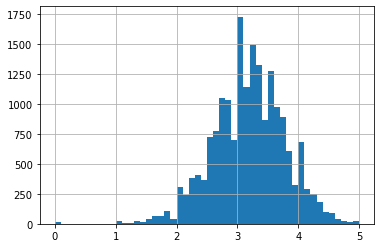

In [68]:
df['longevity'].hist(bins=50)

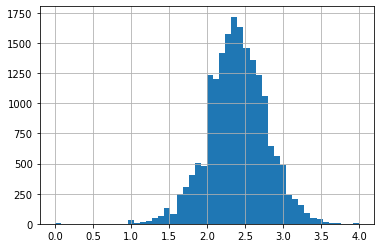

In [69]:
df['sillage'].hist(bins=50)

In [70]:
df['longevity'].max()

5.0

In [71]:
df['sillage'].max()

4.0

In [72]:
df = df[df['sillage'] >= 1.0]

In [73]:
df = df[df['longevity'] > 0.0]

In [74]:
df['longevity'].min()

1.0

In [75]:
df

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,gender,accord_1,accord_2,accord_3,accord_4,accord_5,accord_6,balsamic,woody,fruity,white floral,sweet,musky,green,floral,amber,earthy,patchouli,citrus,warm spicy,vanilla,aromatic,whiskey,powdery,fresh spicy,rose,ozonic,cherry,aquatic,leather,tuberose,fresh,metallic,animalic,oud,herbal,aldehydic,marine,almond,coffee,soft spicy,yellow floral,tobacco,cinnamon,nutty,cacao,smoky,caramel,coconut,honey,tropical,beeswax,rum,coca-cola,milky,salty,bacon,sand,vodka,savory,wine,sour,lactonic,bitter,tennis ball,gourmand,clay,conifer,white wine,industrial glue,terpenic,narcotic,tonka (coumarin),soapy,vinyl,watery,asphault,camphor,caramela,anis,violet,mossy,alcohol,longevity,sillage
0,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,women,balsamic,woody,smoky,fresh spicy,warm spicy,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.50,2.40
1,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,women,woody,powdery,balsamic,floral,ozonic,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.83,2.12
2,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,women,fruity,patchouli,woody,earthy,sweet,citrus,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.57,2.44
3,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,women,fruity,woody,sweet,balsamic,yellow floral,None,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.51,2.39
4,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,women,fruity,sweet,white floral,patchouli,citrus,None,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.20,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [76]:
df = df.reset_index(drop=True)

In [77]:
df['spring'] = np.nan
df['summer'] = np.nan
df['autumn'] = np.nan
df['winter'] = np.nan

In [78]:
df.shape

(18685, 117)

In [79]:
for i in ['winter','summer','spring','autumn'] :
    df[i] = 0.0

In [80]:
for i in range (0, 18685):
    r = df['clswinter'][i] + df['clsspring'][i] + df['clssummer'][i] + df['clsautumn'][i]
    if r != 0:
        df['winter'][i] = round(df['clswinter'][i]/r,2)
        df['spring'][i] = round(df['clsspring'][i]/r,2)
        df['summer'][i] = round(df['clssummer'][i]/r,2)
        df['autumn'][i] = round(df['clsautumn'][i]/r,2)

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [81]:
df

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,gender,accord_1,accord_2,accord_3,accord_4,accord_5,accord_6,balsamic,woody,fruity,white floral,sweet,musky,green,floral,amber,earthy,patchouli,citrus,warm spicy,vanilla,aromatic,whiskey,powdery,fresh spicy,rose,ozonic,cherry,aquatic,leather,tuberose,fresh,metallic,animalic,oud,herbal,aldehydic,marine,almond,coffee,soft spicy,yellow floral,tobacco,cinnamon,nutty,cacao,smoky,caramel,coconut,honey,tropical,beeswax,rum,coca-cola,milky,salty,bacon,sand,vodka,savory,wine,sour,lactonic,bitter,tennis ball,gourmand,clay,conifer,white wine,industrial glue,terpenic,narcotic,tonka (coumarin),soapy,vinyl,watery,asphault,camphor,caramela,anis,violet,mossy,alcohol,longevity,sillage,spring,summer,autumn,winter
0,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,women,balsamic,woody,smoky,fresh spicy,warm spicy,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.50,2.40,0.11,0.11,0.44,0.33
1,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,women,woody,powdery,balsamic,floral,ozonic,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.83,2.12,0.37,0.16,0.16,0.32
2,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,women,fruity,patchouli,woody,earthy,sweet,citrus,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.57,2.44,0.40,0.16,0.24,0.20
3,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,women,fruity,woody,sweet,balsamic,yellow floral,None,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.51,2.39,0.24,0.16,0.30,0.30
4,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,women,fruity,sweet,white floral,patchouli,citrus,None,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.20,2.30,0.37,0.19,0.28,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [82]:
df = pd.get_dummies(data=df, columns=['gender'])

In [83]:
df

,brand,title,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,Ihaveit,Ihadit,Iwantit,accord_1,accord_2,accord_3,accord_4,accord_5,accord_6,balsamic,woody,fruity,white floral,sweet,musky,green,floral,amber,earthy,patchouli,citrus,warm spicy,vanilla,aromatic,whiskey,powdery,fresh spicy,rose,ozonic,cherry,aquatic,leather,tuberose,fresh,metallic,animalic,oud,herbal,aldehydic,marine,almond,coffee,soft spicy,yellow floral,tobacco,cinnamon,nutty,cacao,smoky,caramel,coconut,honey,tropical,beeswax,rum,coca-cola,milky,salty,bacon,sand,vodka,savory,wine,sour,lactonic,bitter,tennis ball,gourmand,clay,conifer,white wine,industrial glue,terpenic,narcotic,tonka (coumarin),soapy,vinyl,watery,asphault,camphor,caramela,anis,violet,mossy,alcohol,longevity,sillage,spring,summer,autumn,winter,gender_man,gender_unisex,gender_women
0,Blackbird,Targa Blackbird for women and men,"balsamic,woody,smoky,fresh spicy,warm spicy",4.10,22,0,2,1,4,1,0,7,2,1,100,54,27,54,18,18,72,0,0,36,72,19.0,0.0,0.0,balsamic,woody,smoky,fresh spicy,warm spicy,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.50,2.40,0.11,0.11,0.44,0.33,0,0,1
1,Blackbird,Triton Blackbird for women and men,"woody,powdery,balsamic,floral,ozonic",4.00,24,0,1,1,2,2,1,5,2,0,100,77,33,66,77,33,33,0,0,55,66,14.0,0.0,0.0,woody,powdery,balsamic,floral,ozonic,None,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.83,2.12,0.37,0.16,0.16,0.32,0,0,1
2,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,"fruity,patchouli,woody,earthy,sweet,citrus,Vid...",4.00,2386,22,25,113,141,70,49,211,109,65,100,65,33,22,44,18,27,0,0,51,24,1529.0,0.0,0.0,fruity,patchouli,woody,earthy,sweet,citrus,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.57,2.44,0.40,0.16,0.24,0.20,0,0,1
3,Hanae-Mori,Hanae Mori Hanae Mori for women,"fruity,woody,sweet,balsamic,yellow floral,Pict...",4.02,2195,19,26,131,161,50,68,214,145,55,100,83,31,39,31,20,39,36,15,57,26,1826.0,0.0,0.0,fruity,woody,sweet,balsamic,yellow floral,None,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.51,2.39,0.24,0.16,0.30,0.30,0,0,1
4,Yves-Saint-Laurent,Mon Paris Yves Saint Laurent for women,"fruity,sweet,white floral,patchouli,citrus,Vid...",3.51,1928,36,48,200,91,57,83,257,120,60,81,100,68,24,53,27,41,0,0,60,30,1151.0,0.0,0.0,fruity,sweet,white floral,patchouli,citrus,None,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.20,2.30,0.37,0.19,0.28,0.17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [84]:
df['gender_man'].sum() + df['gender_women'].sum() + df['gender_unisex'].sum()

18685

In [85]:
df['gender_women'].sum()

14321

In [86]:
df['gender_unisex'].sum()

4020

In [87]:
df.columns.tolist()

['brand',
 'title',
 'accords',
 'rating_score',
 'votes',
 'longevity_poor',
 'longevity_weak',
 'longevity_moderate',
 'longevity_long',
 'longevity_very_long',
 'sillage_soft',
 'sillage_moderate',
 'sillage_heavy',
 'sillage_enormous',
 'clslove',
 'clslike',
 'clsdislike',
 'clswinter',
 'clsspring',
 'clssummer',
 'clsautumn',
 'clscold',
 'clshot',
 'clsday',
 'clsnight',
 'Ihaveit',
 'Ihadit',
 'Iwantit',
 'accord_1',
 'accord_2',
 'accord_3',
 'accord_4',
 'accord_5',
 'accord_6',
 'balsamic',
 'woody',
 'fruity',
 'white floral',
 'sweet',
 'musky',
 'green',
 'floral',
 'amber',
 'earthy',
 'patchouli',
 'citrus',
 'warm spicy',
 'vanilla',
 'aromatic',
 'whiskey',
 'powdery',
 'fresh spicy',
 'rose',
 'ozonic',
 'cherry',
 'aquatic',
 'leather',
 'tuberose',
 'fresh',
 'metallic',
 'animalic',
 'oud',
 'herbal',
 'aldehydic',
 'marine',
 'almond',
 'coffee',
 'soft spicy',
 'yellow floral',
 'tobacco',
 'cinnamon',
 'nutty',
 'cacao',
 'smoky',
 'caramel',
 'coconut',
 'hon

In [88]:
df_base = df.drop(['longevity_poor', 'longevity_weak', 'longevity_moderate', 'longevity_long', 'longevity_very_long',
                   'sillage_soft', 'sillage_moderate', 'sillage_heavy', 'sillage_enormous',
                   'clslove', 'clslike', 'clsdislike',
                   'clswinter', 'clsspring', 'clssummer', 'clsautumn',
                   'clscold', 'clshot',
                   'clsday', 'clsnight',
                   'Ihaveit', 'Ihadit', 'Iwantit',], axis = 1)

In [89]:
df_base = df_base.drop(['accords'], axis = 1)

In [90]:
df_base = df_base.drop(['brand', 'title', 'accord_1', 'accord_2', 'accord_3', 'accord_4', 'accord_5', 'accord_6'], axis = 1)

In [114]:
df_base

,rating_score,votes,balsamic,woody,fruity,white floral,sweet,musky,green,floral,amber,earthy,patchouli,citrus,warm spicy,vanilla,aromatic,whiskey,powdery,fresh spicy,rose,ozonic,cherry,aquatic,leather,tuberose,fresh,metallic,animalic,oud,herbal,aldehydic,marine,almond,coffee,soft spicy,yellow floral,tobacco,cinnamon,nutty,cacao,smoky,caramel,coconut,honey,tropical,beeswax,rum,coca-cola,milky,salty,bacon,sand,vodka,savory,wine,sour,lactonic,bitter,tennis ball,gourmand,clay,conifer,white wine,industrial glue,terpenic,narcotic,tonka (coumarin),soapy,vinyl,watery,asphault,camphor,caramela,anis,violet,mossy,alcohol,longevity,sillage,spring,summer,autumn,winter,gender_man,gender_unisex,gender_women
0,4.10,22.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.50,2.40,0.11,0.11,0.44,0.33,0.0,0.0,1.0
1,4.00,24.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.83,2.12,0.37,0.16,0.16,0.32,0.0,0.0,1.0
2,4.00,2386.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.57,2.44,0.40,0.16,0.24,0.20,0.0,0.0,1.0
3,4.02,2195.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.51,2.39,0.24,0.16,0.30,0.30,0.0,0.0,1.0
4,3.51,1928.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.20,2.30,0.37,0.19,0.28,0.17,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18680,3.71,125.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.43,2.33,0.49,0.21,0.22,0.08,0.0,0.0,1.0
18681,4.42,274.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.90,2.77,0.12,0.06,0.32,0.50,0.0,1.0,0.0
18682,3.66,41.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.67,2.64,0.42,0.26,0.19,0.13,0.0,0.0,1.0
18683,3.77,29.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [92]:
df_base['oud'].sum()

697.0

In [93]:
#df_base.info()

In [94]:
test1 = df_base.corr()

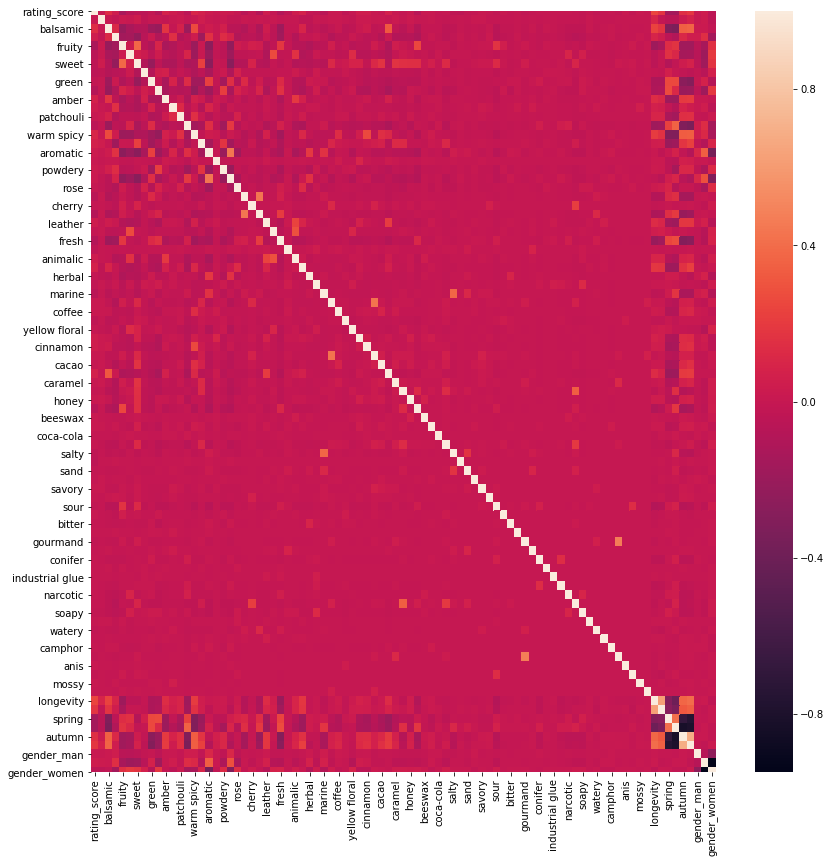

In [95]:
plt.figure(figsize=(14,14))

ax = sns.heatmap(test1)

In [96]:
top_corr = test1['rating_score'].abs().sort_values(ascending=False)[1:6]
top_corr

longevity    0.240438
winter       0.179637
sillage      0.173874
spring       0.150863
summer       0.150728
Name: rating_score, dtype: float64

In [97]:
bottom_corr = test1['rating_score'].sort_values(ascending=True)[1:6]
bottom_corr

summer    -0.150728
fruity    -0.129826
fresh     -0.081723
aquatic   -0.081344
floral    -0.074145
Name: rating_score, dtype: float64

In [105]:
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

In [101]:
df_base_before = df_base
X1 = sm.tools.add_constant(df_base_before)
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index = X1.columns)

/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/kalinazeligowska/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [102]:
print('DATA BEFORE')
print('_'*100)
display(series_before)      #Nie wiem co z ty dalej (sprawdzanie multicolinearity)

DATA BEFORE
____________________________________________________________________________________________________


const              0.000000
rating_score       1.104008
votes              1.036237
balsamic           1.731181
woody              1.662072
                    ...    
autumn           472.112250
winter           611.722740
gender_man              inf
gender_unisex           inf
gender_women            inf
Length: 88, dtype: float64

Text(0, 0.5, 'votes')

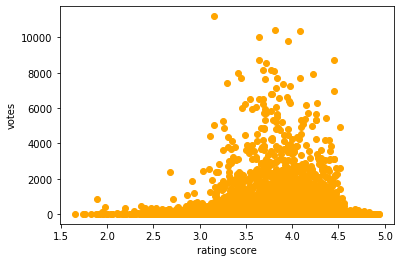

In [103]:
x = df_base['rating_score']
y = df_base['votes']
plt.plot(x, y, 'o', color = 'orange')
plt.xlabel('rating score')
plt.ylabel('votes')

In [104]:
df_base = df_base.astype(float)   # Daj to wcześniej!!!!!!

In [106]:
# Spliting the data

In [107]:
Y = df_base.drop('rating_score', axis = 1)
X = df_base[['rating_score']]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [110]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

In [112]:
print('The coefficient of my model is {:.2}'.format(coefficient))
print('The intercept of my model is {:.4}'.format(intercept))

The coefficient of my model is 4.9
The intercept of my model is 210.0


In [113]:
# Single prediction

In [ ]:
prediction = regression_model.oredict([[   # value ]])